In [156]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
import easyocr

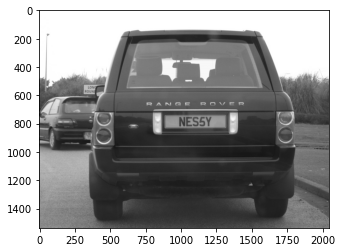

In [157]:
img = cv2.imread('unnamed-2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

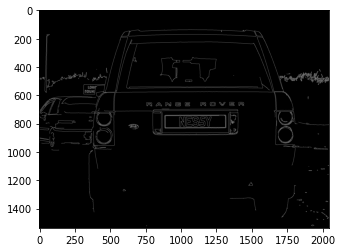

In [158]:
bfilter = cv2.bilateralFilter(gray,11,17,17)
edged = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [159]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea,reverse=True)[:10]

In [160]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break

In [161]:
location

array([[[1321,  748]],

       [[ 893,  740]],

       [[ 887,  828]],

       [[1316,  831]]], dtype=int32)

In [162]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask,[location], 0,255,-1)
new_image = cv2.bitwise_and(img,img,mask = mask)

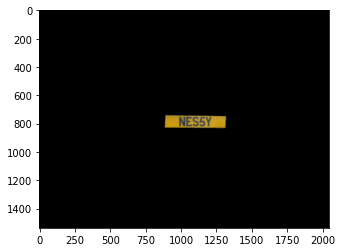

In [163]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [164]:
(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

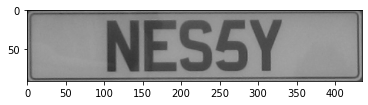

In [165]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [166]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[95, 3], [340, 3], [340, 92], [95, 92]], 'NESSY', 0.9997314631242874)]